In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# AR MODEL

In [5]:
from statsmodels.tsa.ar_model import AutoReg    #for AR MODEL (without any seasonal component)
import matplotlib.pyplot as plt

In [6]:
# create a data 
data = [0,12,14,16,18,20,22]

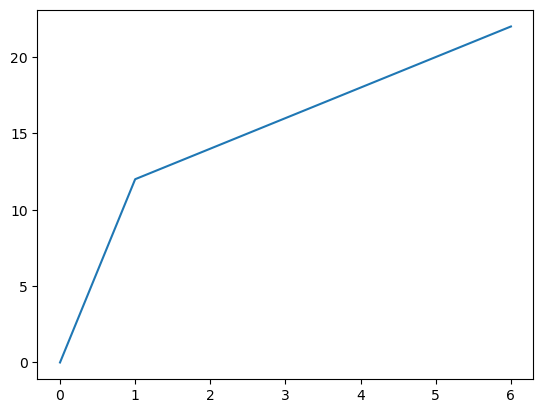

In [7]:
plt.plot(data)

In [8]:
ARmodel = AutoReg(data, lags=1)    #calling AutoRegression model, 
                                   #lags=1 means at high level, the forecast will depend on last value
ARmodel_fit = ARmodel.fit()

In [9]:
#making prdictions
ypredicted = ARmodel_fit.predict(8,10)   #next 3 values, 8 to 10
print(ypredicted)

[20.68144044 20.48068232 20.38558636]


In [10]:
pred_list = ypredicted.tolist()
combinedlist = data + pred_list

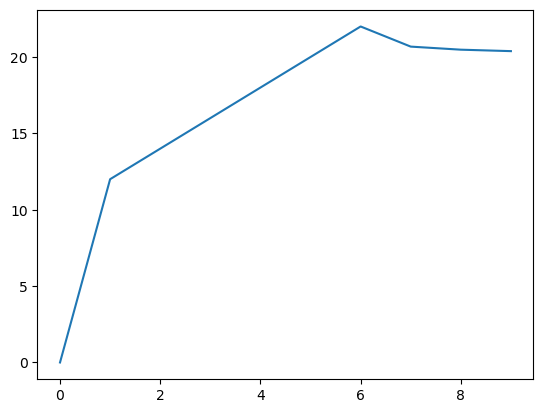

In [11]:
plt.plot(combinedlist)

# MA MODEL

In [12]:
from statsmodels.tsa.arima_model import ARMA     # FOR DATA WITHOUT TREND AND SEASONALITY

* In an ARMA model, the time series is modeled as a combination of p autoregressive terms and q moving average terms. 
* The model is denoted as ARMA(p,q). The p and q parameters indicate the number of autoregressive and moving average terms used in the model, respectively.

* The ARIMA model is denoted as ARIMA(p,d,q), where p, d, and q represent the order of the autoregressive, differencing, and moving average components, respectively. 
* The p and q parameters represent the number of autoregressive and moving average terms used in the model, while the d parameter represents the number of times the time series is differenced.

In [13]:
import statsmodels.tsa.arima.model

In [14]:
MAmodel = statsmodels.tsa.arima.model.ARIMA(data, order=(0,0,1))   #p=0, d=0, q=1
MAmodel_fit = MAmodel.fit()

C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [15]:
ypredicted_MA = MAmodel_fit.predict(8,10)
print(ypredicted_MA)

[13.49999387 13.49999387 13.49999387]


In [16]:
pred_list_MA = ypredicted_MA.tolist()
combinedlist = data + pred_list_MA

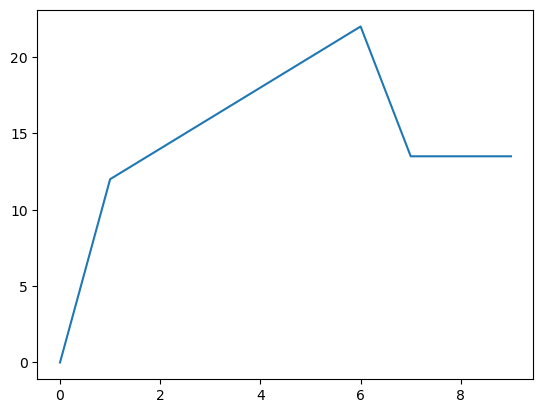

In [17]:
plt.plot(combinedlist)

# ARMA MODEL

In [18]:
import numpy as np
import pandas as pd

In [2]:
DATA1 = pd.read_csv(r'D:\M.TECH CIVIL\2ND YEAR\MTech-thesis\SPEI\SPEI_raichur.csv')

In [3]:
DATA1.columns

Index(['Unnamed: 0', 'TIME', 'LONGITUDE', 'LATITUDE', 'RAINFALL', 'tmax',
       'tmin', 'ELEVATION', 'rhum', 'PRESSURE', 'wind_2m', 'netRad', 'ET_node',
       'P_anomaly', 'ET0_anomaly', 'WB', 'CWB', 'CWB_mean', 'CWB_std', 'SPEI'],
      dtype='object')

In [4]:
DATA1.head()

,Unnamed: 0,TIME,LONGITUDE,LATITUDE,RAINFALL,tmax,tmin,ELEVATION,rhum,PRESSURE,wind_2m,netRad,ET_node,P_anomaly,ET0_anomaly,WB,CWB,CWB_mean,CWB_std,SPEI
0,0,1980-01-31,76.0,15.5,0.000000,30.523226,16.431129,610.0,4.904402,94.294216,1.567146,0.639190,5.187237,-5.034085,1.341304,-6.375389,-6.375389,-138.043946,217.419748,0.605596
1,1,1980-02-29,76.0,15.5,0.000000,33.283448,19.340517,610.0,8.843205,94.294216,1.106826,0.718511,4.200711,-4.222931,0.543604,-4.766534,-4.766534,-91.058791,233.463859,0.369617
2,2,1980-03-31,76.0,15.5,0.000000,35.767903,21.232097,610.0,31.331200,94.294216,1.202102,0.842327,2.376152,-16.727739,-0.310564,-16.417176,-16.417176,-621.118011,526.777205,1.147925
3,3,1980-04-30,76.0,15.5,61.689917,37.153167,23.495500,610.0,50.958000,94.294216,0.304631,0.620687,0.089692,21.233118,-0.678498,21.911616,21.911616,-19.737931,660.353418,0.063072
4,4,1980-05-31,76.0,15.5,11.399372,37.696613,24.555645,610.0,57.484802,94.294216,1.937802,0.773205,-1.385384,-57.626789,-1.025867,-56.600922,-56.600922,-513.742528,668.594573,0.683735


In [5]:
# Specify the latitude and longitude of interest
lat = 16
lon = 77

# Create a boolean mask to select the rows with the desired lat and lon values
mask = (DATA1['LATITUDE'] == lat) & (DATA1['LONGITUDE'] == lon)

# Apply the mask to the DataFrame to select the desired rows
data = DATA1.loc[mask]


In [6]:
data=data.drop('Unnamed: 0', axis=1).drop('LONGITUDE', axis=1).drop('LATITUDE', axis=1).drop('P_anomaly', axis=1).drop('ET0_anomaly', axis=1).drop('WB', axis=1).drop('CWB', axis=1).drop('CWB_mean', axis=1).drop('CWB_std', axis=1)

In [7]:
data=data.set_index('TIME')

In [8]:
data.head(5)

,RAINFALL,tmax,tmin,ELEVATION,rhum,PRESSURE,wind_2m,netRad,ET_node,SPEI
TIME,,,,,,,,,,
1980-01-31,0.000000,30.644355,16.826532,445.0,5.191606,96.149244,1.198294,0.577492,4.249513,-0.598585
1980-02-29,0.000000,33.963448,19.985172,445.0,9.062808,96.149244,0.872371,0.689171,3.576118,-0.892040
1980-03-31,0.000000,36.862500,22.181774,445.0,34.810806,96.149244,0.863439,0.799726,1.600403,-1.043919
1980-04-30,32.740664,38.888333,24.975167,445.0,53.716000,96.149244,1.253892,0.656416,-0.440303,0.253684
1980-05-31,2.947689,40.269516,26.265806,445.0,61.573196,96.149244,0.817787,0.796069,-1.136681,0.256922


In [10]:
data1 = data[['SPEI']]

In [11]:
data1

,SPEI
TIME,
1980-01-31,-0.598585
1980-02-29,-0.892040
1980-03-31,-1.043919
1980-04-30,0.253684
1980-05-31,0.256922
...,...
2021-08-31,-1.080433
2021-09-30,-0.748235
2021-10-31,0.567658


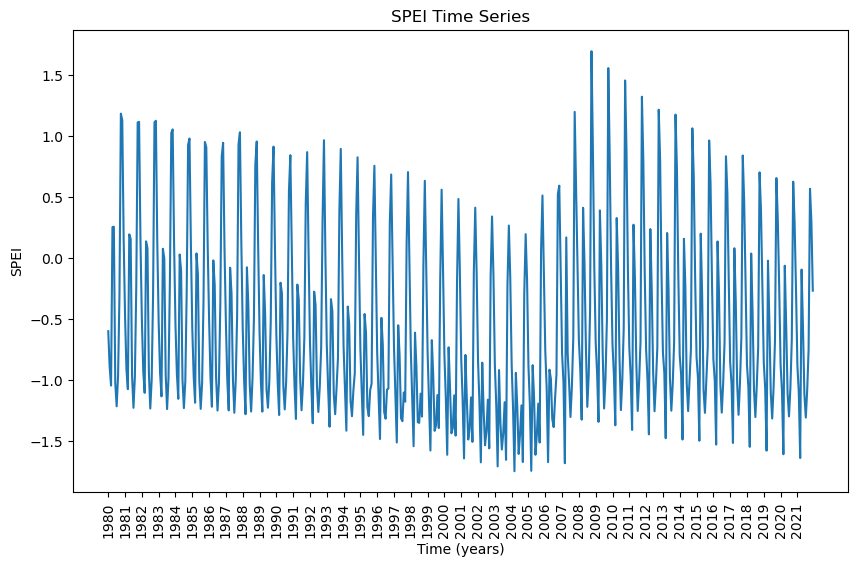

In [28]:
plt.rcParams.update({'figure.figsize' : (10,6)})
plt.plot(data1)

# Add axis labels and a title
plt.xlabel('Time (years)')
plt.ylabel('SPEI')
plt.title('SPEI Time Series')

# Modify the x-axis labels
x_ticks = data1.index[::12]  # Show ticks once a year
x_tick_labels = [str(year)[:4] for year in x_ticks]  # Convert the datetime index to year string
plt.xticks(x_ticks, x_tick_labels, rotation=90)  # Set the x-axis ticks and labels

# # Add a grid
# plt.grid(True)

# Show the plot
plt.show()

In [29]:
data1 = data[['SPEI']]
data1

,SPEI
TIME,
1980-01-31,-0.598585
1980-02-29,-0.892040
1980-03-31,-1.043919
1980-04-30,0.253684
1980-05-31,0.256922
...,...
2021-08-31,-1.080433
2021-09-30,-0.748235
2021-10-31,0.567658


In [30]:
# assuming your original dataframe is called 'df'
data1.index = pd.to_datetime(data1.index)

In [31]:
#fit model
ARMAmodel = statsmodels.tsa.arima.model.ARIMA(data1, order=(1,0,1))   #p=1, d=0, q=1
ARMAmodel_fit = ARMAmodel.fit()

C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [32]:
# make prediction
ypredicted_ARMA = ARMAmodel_fit.predict(len(data1), len(data1) + 15)    # for further 15 month
print(ypredicted_ARMA)

2022-01-31   -0.467587
2022-02-28   -0.537581
2022-03-31   -0.558176
2022-04-30   -0.564237
2022-05-31   -0.566020
2022-06-30   -0.566545
2022-07-31   -0.566699
2022-08-31   -0.566744
2022-09-30   -0.566758
2022-10-31   -0.566762
2022-11-30   -0.566763
2022-12-31   -0.566763
2023-01-31   -0.566763
2023-02-28   -0.566763
2023-03-31   -0.566763
2023-04-30   -0.566763
Freq: M, Name: predicted_mean, dtype: float64


In [33]:
# Create a new index with the next 2 months
new_index = pd.date_range(start=data1.index[-1], periods=15, freq='MS') + pd.offsets.MonthEnd(0)

# Create a new DataFrame with the predicted values and the new index
predicted_df = pd.DataFrame({'SPEI_pred': ypredicted_ARMA}, index=new_index)

# Concatenate the original DataFrame with the predicted DataFrame
combined_df = pd.concat([data1, predicted_df], axis=0)

In [34]:
combined_df

,SPEI,SPEI_pred
1980-01-31,-0.598585,NaN
1980-02-29,-0.892040,NaN
1980-03-31,-1.043919,NaN
1980-04-30,0.253684,NaN
1980-05-31,0.256922,NaN
...,...,...
2022-11-30,NaN,-0.566763
2022-12-31,NaN,-0.566763
2023-01-31,NaN,-0.566763
2023-02-28,NaN,-0.566763


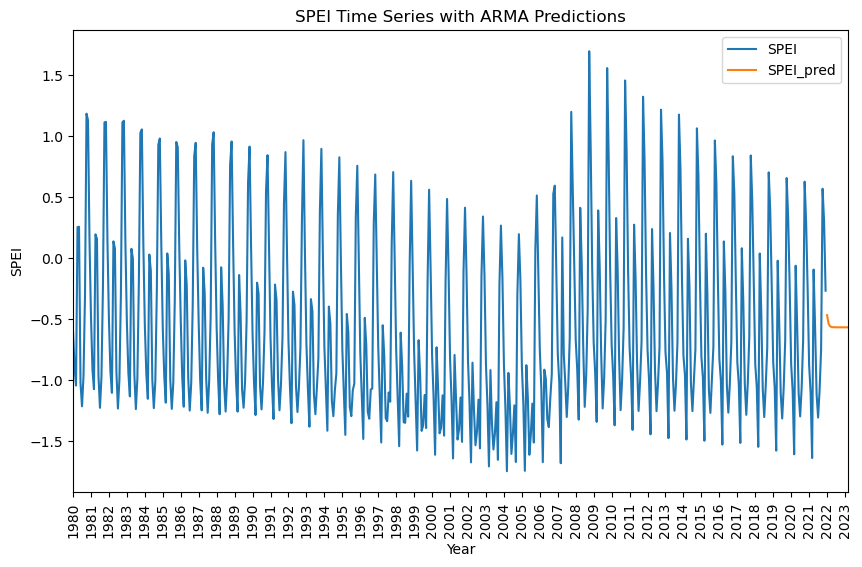

In [35]:
# plot the original and predicted time series
fig, ax = plt.subplots(figsize=(10,6))
combined_df.plot(ax=ax)
ax.set_title('SPEI Time Series with ARMA Predictions')
ax.set_xlabel('Year')
ax.set_ylabel('SPEI')

#Modify the x-axis labels
x_ticks = combined_df.index[::12]  # Show ticks once a year
x_tick_labels = [str(year)[:4] for year in x_ticks]  # Convert the datetime index to year string
plt.xticks(x_ticks, x_tick_labels, rotation=90)  # Set the x-axis ticks and labels

# # Add a grid
# plt.grid(True)

# Show the plot
plt.show()

# ARIMA MODEL

## example-1

In [36]:
data

,RAINFALL,tmax,tmin,ELEVATION,rhum,PRESSURE,wind_2m,netRad,ET_node,SPEI
TIME,,,,,,,,,,
1980-01-31,0.000000,30.644355,16.826532,445.0,5.191606,96.149244,1.198294,0.577492,4.249513,-0.598585
1980-02-29,0.000000,33.963448,19.985172,445.0,9.062808,96.149244,0.872371,0.689171,3.576118,-0.892040
1980-03-31,0.000000,36.862500,22.181774,445.0,34.810806,96.149244,0.863439,0.799726,1.600403,-1.043919
1980-04-30,32.740664,38.888333,24.975167,445.0,53.716000,96.149244,1.253892,0.656416,-0.440303,0.253684
1980-05-31,2.947689,40.269516,26.265806,445.0,61.573196,96.149244,0.817787,0.796069,-1.136681,0.256922
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,77.891208,31.159831,22.517701,445.0,59.108387,96.149244,2.106744,0.539913,-1.512717,-1.080433
2021-09-30,68.645367,30.452479,22.177730,445.0,59.962997,96.149244,2.010015,0.414049,-1.575581,-0.748235
2021-10-31,93.261266,31.992137,21.450834,445.0,45.288063,96.149244,0.918749,0.368254,0.480149,0.567658


In [37]:

data.index = pd.to_datetime(data.index)

In [38]:
data

,RAINFALL,tmax,tmin,ELEVATION,rhum,PRESSURE,wind_2m,netRad,ET_node,SPEI
TIME,,,,,,,,,,
1980-01-31,0.000000,30.644355,16.826532,445.0,5.191606,96.149244,1.198294,0.577492,4.249513,-0.598585
1980-02-29,0.000000,33.963448,19.985172,445.0,9.062808,96.149244,0.872371,0.689171,3.576118,-0.892040
1980-03-31,0.000000,36.862500,22.181774,445.0,34.810806,96.149244,0.863439,0.799726,1.600403,-1.043919
1980-04-30,32.740664,38.888333,24.975167,445.0,53.716000,96.149244,1.253892,0.656416,-0.440303,0.253684
1980-05-31,2.947689,40.269516,26.265806,445.0,61.573196,96.149244,0.817787,0.796069,-1.136681,0.256922
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,77.891208,31.159831,22.517701,445.0,59.108387,96.149244,2.106744,0.539913,-1.512717,-1.080433
2021-09-30,68.645367,30.452479,22.177730,445.0,59.962997,96.149244,2.010015,0.414049,-1.575581,-0.748235
2021-10-31,93.261266,31.992137,21.450834,445.0,45.288063,96.149244,0.918749,0.368254,0.480149,0.567658


In [39]:
data1=data[['SPEI']]

In [40]:
data1

,SPEI
TIME,
1980-01-31,-0.598585
1980-02-29,-0.892040
1980-03-31,-1.043919
1980-04-30,0.253684
1980-05-31,0.256922
...,...
2021-08-31,-1.080433
2021-09-30,-0.748235
2021-10-31,0.567658


<Axes: xlabel='TIME'>

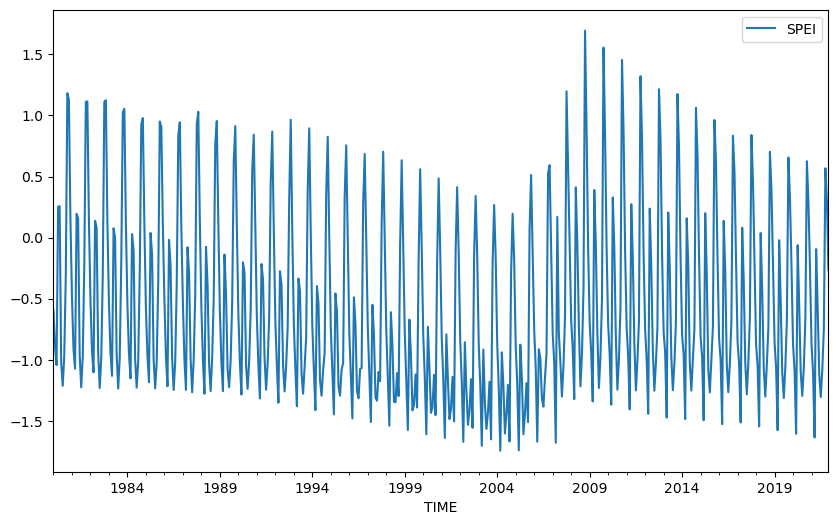

In [41]:
data1.plot()

<b> Checking stationarity 

In [42]:
# Checking stationarity 

from statsmodels.tsa.stattools import adfuller

In [43]:
testresult = adfuller(data1['SPEI'])

In [44]:
# Ho : non stationary    - Null hypothesis
#H1 : stationary

def adfuller_test(spei):
    result =adfuller(spei)
    labels = ['ADF Test Statistic', 'p-value', 'Number of Lags', 'Number of observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Reject Null Hypothesis. Data has no unit root and is stationary ')
    else:
        print('Time series has a unit root, It is non-stationary')

In [45]:
adfuller_test(data1['SPEI'])

ADF Test Statistic : -2.344305163952596
p-value : 0.15807640234148834
Number of Lags : 18
Number of observations : 485
Time series has a unit root, It is non-stationary


<b> Differncing

In [46]:
data1['SPEI_First_Difference'] = data1['SPEI'] -data1['SPEI'].shift(1)

C:\Users\HP\AppData\Local\Temp\ipykernel_12848\1856048665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['SPEI_First_Difference'] = data1['SPEI'] -data1['SPEI'].shift(1)


In [47]:
data1

,SPEI,SPEI_First_Difference
TIME,,
1980-01-31,-0.598585,NaN
1980-02-29,-0.892040,-0.293456
1980-03-31,-1.043919,-0.151879
1980-04-30,0.253684,1.297603
1980-05-31,0.256922,0.003238
...,...,...
2021-08-31,-1.080433,0.225303
2021-09-30,-0.748235,0.332198
2021-10-31,0.567658,1.315893


In [48]:
data1['SPEI_Second_Difference'] = data1['SPEI'] -data1['SPEI'].shift(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_12848\1846436111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['SPEI_Second_Difference'] = data1['SPEI'] -data1['SPEI'].shift(2)


In [49]:
data1

,SPEI,SPEI_First_Difference,SPEI_Second_Difference
TIME,,,
1980-01-31,-0.598585,NaN,NaN
1980-02-29,-0.892040,-0.293456,NaN
1980-03-31,-1.043919,-0.151879,-0.445334
1980-04-30,0.253684,1.297603,1.145724
1980-05-31,0.256922,0.003238,1.300841
...,...,...,...
2021-08-31,-1.080433,0.225303,0.035312
2021-09-30,-0.748235,0.332198,0.557501
2021-10-31,0.567658,1.315893,1.648091


In [50]:
adfuller_test((data1['SPEI_Second_Difference']).dropna())

ADF Test Statistic : -3.033660390267825
p-value : 0.031868285415306785
Number of Lags : 16
Number of observations : 485
Reject Null Hypothesis. Data has no unit root and is stationary 


<Axes: xlabel='TIME'>

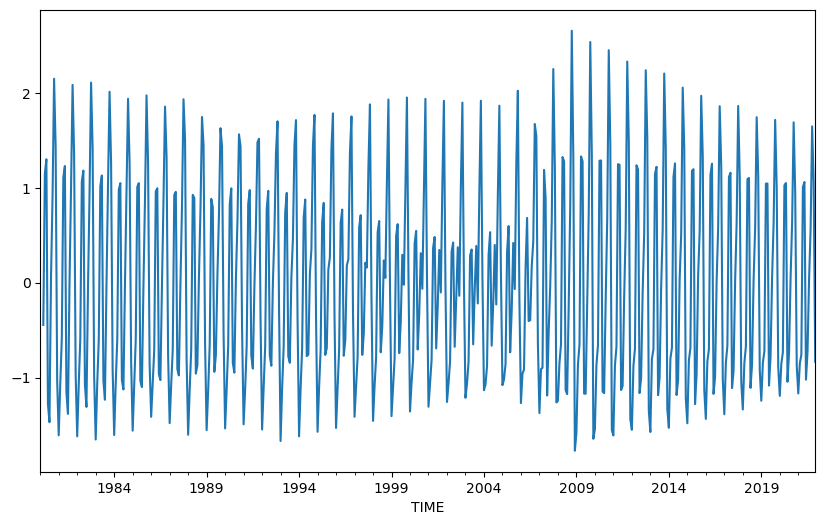

In [51]:
data1['SPEI_Second_Difference'].plot()

In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


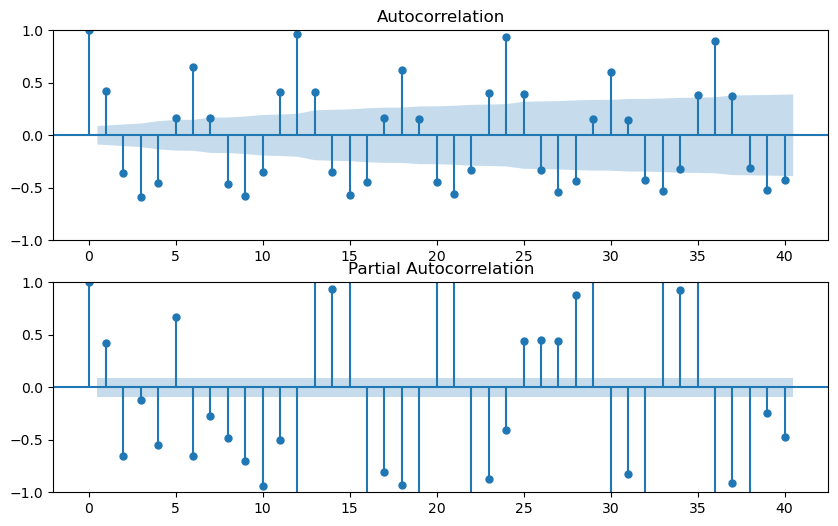

In [55]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1['SPEI_Second_Difference'].iloc[13:], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1['SPEI_Second_Difference'].iloc[13:], lags = 40, ax=ax2)

In [56]:
model = sm.tsa.statespace.SARIMAX(data1['SPEI'], order = (1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [57]:
data1

,SPEI,SPEI_First_Difference,SPEI_Second_Difference
TIME,,,
1980-01-31,-0.598585,NaN,NaN
1980-02-29,-0.892040,-0.293456,NaN
1980-03-31,-1.043919,-0.151879,-0.445334
1980-04-30,0.253684,1.297603,1.145724
1980-05-31,0.256922,0.003238,1.300841
...,...,...,...
2021-08-31,-1.080433,0.225303,0.035312
2021-09-30,-0.748235,0.332198,0.557501
2021-10-31,0.567658,1.315893,1.648091


In [58]:
data1['SPEI_FORECAST']=results.predict(start = 200, end =300, dynamic = True)


C:\Users\HP\AppData\Local\Temp\ipykernel_12848\1987158861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['SPEI_FORECAST']=results.predict(start = 200, end =300, dynamic = True)


<Axes: xlabel='TIME'>

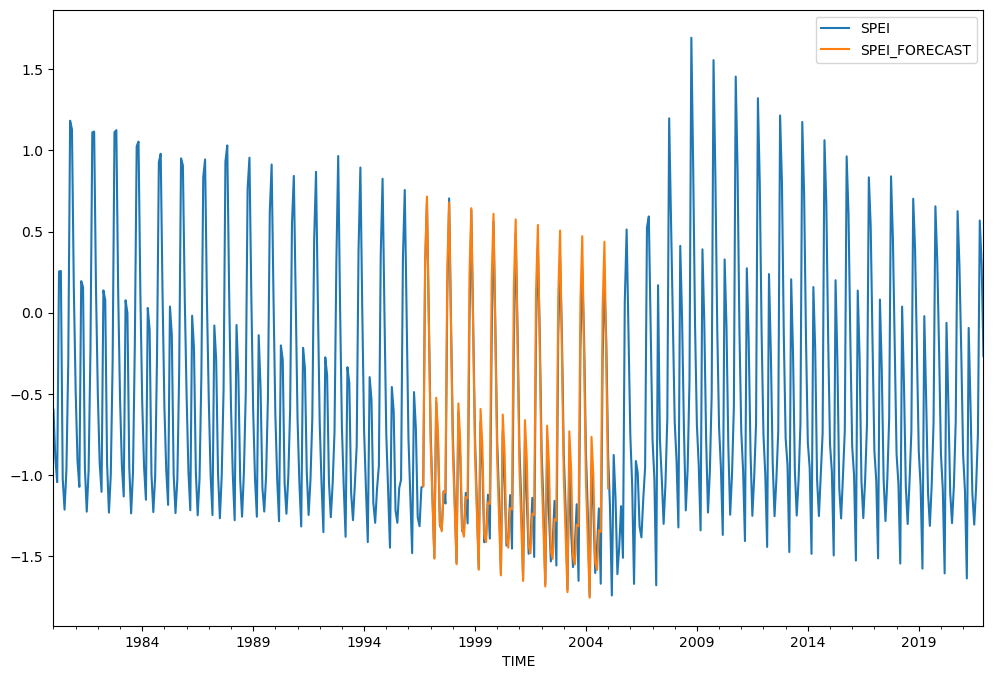

In [59]:
data1[['SPEI', 'SPEI_FORECAST']].plot(figsize=(12,8))

In [60]:
from pandas.tseries.offsets import DateOffset
future_dates = [data1.index[-1]+ DateOffset(months=x) for x in range(0,144)]

In [61]:
future_dates_df =pd.DataFrame(index=future_dates[1:], columns=data1.columns)

In [62]:
future_dates_df.tail()

,SPEI,SPEI_First_Difference,SPEI_Second_Difference,SPEI_FORECAST
2033-07-31,NaN,NaN,NaN,NaN
2033-08-31,NaN,NaN,NaN,NaN
2033-09-30,NaN,NaN,NaN,NaN
2033-10-31,NaN,NaN,NaN,NaN
2033-11-30,NaN,NaN,NaN,NaN


In [63]:
future_df = pd.concat([data1, future_dates_df])

<Axes: >

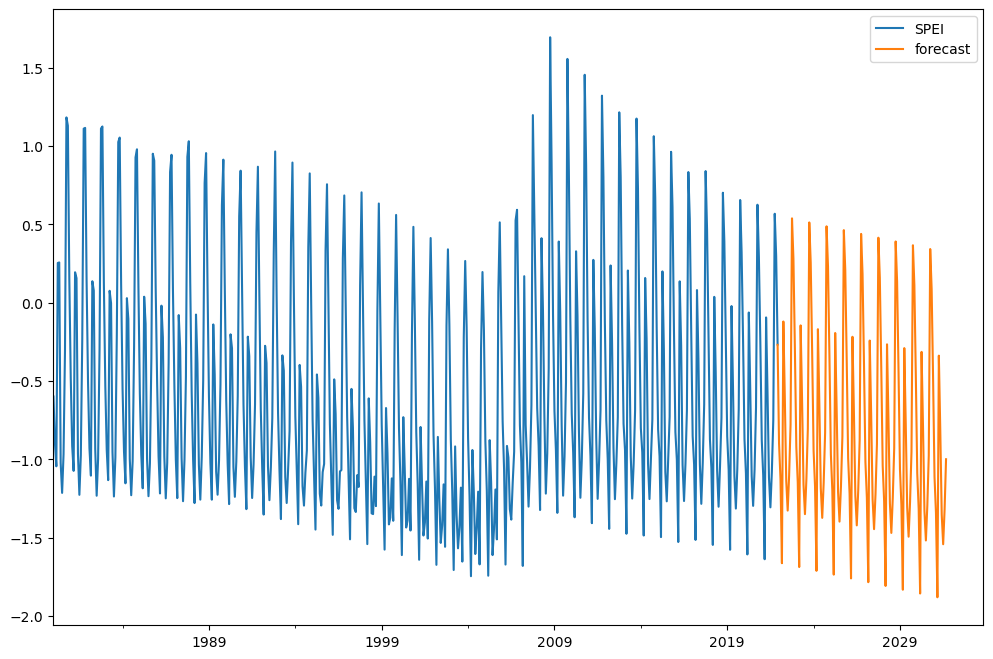

In [64]:
future_df['forecast'] = results.predict(start = 503, end =620, dynamic = True)
future_df[['SPEI', 'forecast']].plot(figsize=(12,8))

## example-2

In [5]:
DATA1=DATA1.drop('Unnamed: 0', axis=1).drop('P_anomaly', axis=1).drop('ET0_anomaly', axis=1).drop('WB', axis=1).drop('CWB', axis=1).drop('CWB_mean', axis=1).drop('CWB_std', axis=1)

In [6]:
DATA1=DATA1.set_index('TIME')

In [7]:
DATA1.index = pd.to_datetime(DATA1.index)

In [8]:
DATA1

,LONGITUDE,LATITUDE,RAINFALL,tmax,tmin,ELEVATION,rhum,PRESSURE,wind_2m,netRad,ET_node,SPEI
TIME,,,,,,,,,,,,
1980-01-31,76.00,15.50,0.000000,30.523226,16.431129,610.0,4.904402,94.294216,1.567146,0.639190,5.187237,0.605596
1980-02-29,76.00,15.50,0.000000,33.283448,19.340517,610.0,8.843205,94.294216,1.106826,0.718511,4.200711,0.369617
1980-03-31,76.00,15.50,0.000000,35.767903,21.232097,610.0,31.331200,94.294216,1.202102,0.842327,2.376152,1.147925
1980-04-30,76.00,15.50,61.689917,37.153167,23.495500,610.0,50.958000,94.294216,0.304631,0.620687,0.089692,0.063072
1980-05-31,76.00,15.50,11.399372,37.696613,24.555645,610.0,57.484802,94.294216,1.937802,0.773205,-1.385384,0.683735
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,77.75,16.75,191.631608,31.170137,22.475227,444.0,59.788147,96.160576,1.917807,0.514604,-1.516943,2.339884
2021-09-30,77.75,16.75,240.721091,30.373825,22.100416,444.0,61.070747,96.160576,1.689383,0.362394,-1.532912,1.074395
2021-10-31,77.75,16.75,51.241061,32.059110,21.169867,444.0,42.425564,96.160576,0.485106,0.330102,0.436214,-1.022736


In [9]:
DATA1.describe()

,LONGITUDE,LATITUDE,RAINFALL,tmax,tmin,ELEVATION,rhum,PRESSURE,wind_2m,netRad,ET_node,SPEI
count,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,24192.000000,2.419200e+04
mean,76.875000,16.125000,78.584699,33.304338,21.052988,461.166667,40.722599,95.968079,1.828585,0.555200,0.630124,-5.639228e-17
std,0.572834,0.426965,141.320239,3.333415,2.942136,59.116340,20.446494,0.667900,1.173318,0.173724,2.891689,9.997726e-01
min,76.000000,15.500000,0.000000,27.922379,13.249677,338.000000,2.985999,94.294216,0.007170,0.172827,-8.472711,-3.044202e+00
25%,76.437500,15.750000,0.626714,30.718699,18.602893,429.750000,20.477692,95.609403,1.001284,0.410662,-1.377032,-7.697973e-01
50%,76.875000,16.125000,28.878624,32.042500,21.798065,457.500000,44.622512,96.007686,1.497244,0.536796,0.643231,-9.784092e-02
75%,77.312500,16.500000,93.900146,35.821969,23.063620,492.750000,58.905625,96.322177,2.392291,0.714788,2.961659,7.608570e-01
max,77.750000,16.750000,1188.721019,41.917685,27.486613,610.000000,79.254800,97.367918,6.573813,0.969469,8.081359,2.774544e+00


In [14]:
data

,LONGITUDE,LATITUDE,RAINFALL,tmax,tmin,ELEVATION,rhum,PRESSURE,wind_2m,netRad,ET_node,SPEI
TIME,,,,,,,,,,,,
1980-01-31,77.0,16.0,0.000000,30.644355,16.826532,445.0,5.191606,96.149244,1.198294,0.577492,4.249513,-0.598585
1980-02-29,77.0,16.0,0.000000,33.963448,19.985172,445.0,9.062808,96.149244,0.872371,0.689171,3.576118,-0.892040
1980-03-31,77.0,16.0,0.000000,36.862500,22.181774,445.0,34.810806,96.149244,0.863439,0.799726,1.600403,-1.043919
1980-04-30,77.0,16.0,32.740664,38.888333,24.975167,445.0,53.716000,96.149244,1.253892,0.656416,-0.440303,0.253684
1980-05-31,77.0,16.0,2.947689,40.269516,26.265806,445.0,61.573196,96.149244,0.817787,0.796069,-1.136681,0.256922
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,77.0,16.0,77.891208,31.159831,22.517701,445.0,59.108387,96.149244,2.106744,0.539913,-1.512717,-1.080433
2021-09-30,77.0,16.0,68.645367,30.452479,22.177730,445.0,59.962997,96.149244,2.010015,0.414049,-1.575581,-0.748235
2021-10-31,77.0,16.0,93.261266,31.992137,21.450834,445.0,45.288063,96.149244,0.918749,0.368254,0.480149,0.567658


In [15]:
data.index = pd.to_datetime(data.index)

In [16]:
data.describe()

,LONGITUDE,LATITUDE,RAINFALL,tmax,tmin,ELEVATION,rhum,PRESSURE,wind_2m,netRad,ET_node,SPEI
count,504.0,504.0,504.000000,504.000000,504.000000,504.0,504.000000,5.040000e+02,504.000000,504.000000,504.000000,504.000000
mean,77.0,16.0,68.907926,33.417574,21.160159,445.0,40.768501,9.614924e+01,1.767879,0.553781,0.668000,-0.567015
std,0.0,0.0,131.025475,3.333896,2.922811,0.0,20.366964,1.706997e-13,1.036557,0.172903,2.850549,0.743920
min,77.0,16.0,0.000000,28.295403,13.801613,445.0,3.341992,9.614924e+01,0.035777,0.198312,-6.845127,-1.745077
25%,77.0,16.0,0.000000,30.792890,18.822621,445.0,20.705107,9.614924e+01,1.057092,0.401355,-1.254572,-1.117073
50%,77.0,16.0,21.015014,32.080659,21.988347,445.0,44.891603,9.614924e+01,1.493541,0.538911,0.582244,-0.787251
75%,77.0,16.0,79.460968,35.852895,23.066038,445.0,58.666704,9.614924e+01,2.268820,0.731463,3.000440,-0.076939
max,77.0,16.0,1078.080546,41.516030,26.541694,445.0,77.117195,9.614924e+01,4.964704,0.871579,6.967041,1.693870


In [17]:
type(data)

pandas.core.frame.DataFrame

In [18]:
data2 = data[['SPEI']]

In [19]:
data2

,SPEI
TIME,
1980-01-31,-0.598585
1980-02-29,-0.892040
1980-03-31,-1.043919
1980-04-30,0.253684
1980-05-31,0.256922
...,...
2021-08-31,-1.080433
2021-09-30,-0.748235
2021-10-31,0.567658


In [20]:
data2.index = pd.to_datetime(data2.index)

In [21]:
type(data2)

pandas.core.frame.DataFrame

In [22]:
data2.describe()

,SPEI
count,504.000000
mean,-0.567015
std,0.743920
min,-1.745077
25%,-1.117073
50%,-0.787251
75%,-0.076939
max,1.693870


In [23]:
data2_ma =data2.rolling(window=12).mean()

<Axes: xlabel='TIME'>

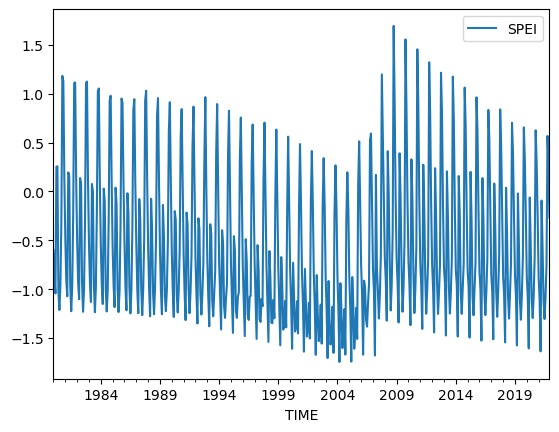

In [24]:
data2.plot()

<Axes: xlabel='TIME'>

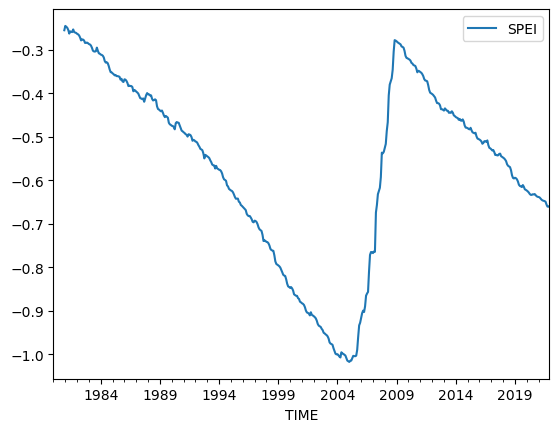

In [25]:
data2_ma.plot()

In [26]:
data2_base = pd.concat([data2,data2.shift(1)], axis=1)

In [27]:
data2_base.columns=['Actual_spei', 'Forecasted_spei']

In [28]:
data2_base

,Actual_spei,Forecasted_spei
TIME,,
1980-01-31,-0.598585,NaN
1980-02-29,-0.892040,-0.598585
1980-03-31,-1.043919,-0.892040
1980-04-30,0.253684,-1.043919
1980-05-31,0.256922,0.253684
...,...,...
2021-08-31,-1.080433,-1.305736
2021-09-30,-0.748235,-1.080433
2021-10-31,0.567658,-0.748235


In [29]:
data2_base.dropna(inplace=True)

In [30]:
data2_base

,Actual_spei,Forecasted_spei
TIME,,
1980-02-29,-0.892040,-0.598585
1980-03-31,-1.043919,-0.892040
1980-04-30,0.253684,-1.043919
1980-05-31,0.256922,0.253684
1980-06-30,-1.022340,0.256922
...,...,...
2021-08-31,-1.080433,-1.305736
2021-09-30,-0.748235,-1.080433
2021-10-31,0.567658,-0.748235


In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
data2_error =mean_squared_error(data2_base.Actual_spei,data2_base.Forecasted_spei)

In [33]:
data2_error

0.5256337275164252

In [34]:
np.sqrt(data2_error)

0.7250060189518603

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

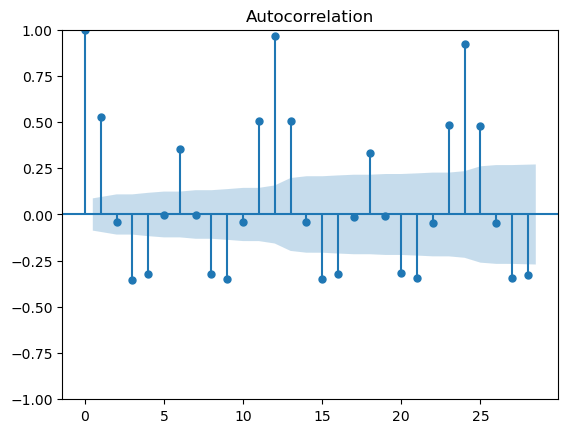

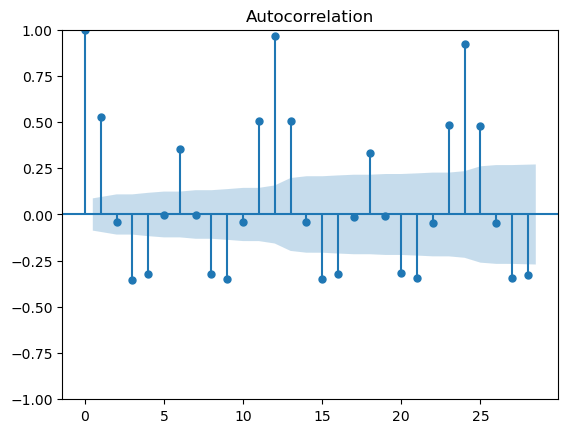

In [36]:
plot_acf(data2)

C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


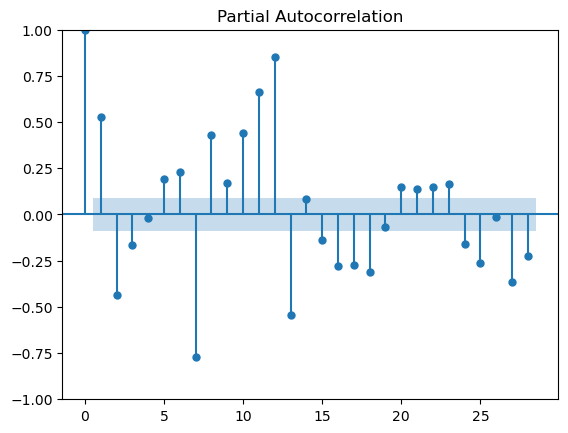

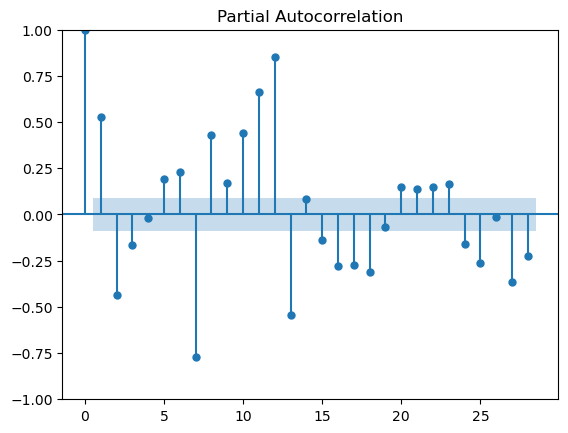

In [37]:
plot_pacf(data2)

In [59]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
data2_train, data2_test = train_test_split(data2, test_size=0.2, random_state=42)


In [60]:
from statsmodels.tsa.arima_model import ARIMA

In [61]:
data2_model = sm.tsa.ARIMA(data2, order=(2, 1, 3))



C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\envs\Kashyap\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [62]:
data2_model_fit = data2_model.fit()

In [63]:
data2_model_fit.aic

694.578631250638

In [64]:
data2_forecast = data2_model_fit.forecast(steps=11)[0]

In [93]:
data2

,SPEI
TIME,
1980-01-31,-0.598585
1980-02-29,-0.892040
1980-03-31,-1.043919
1980-04-30,0.253684
1980-05-31,0.256922
...,...
2021-08-31,-1.080433
2021-09-30,-0.748235
2021-10-31,0.567658


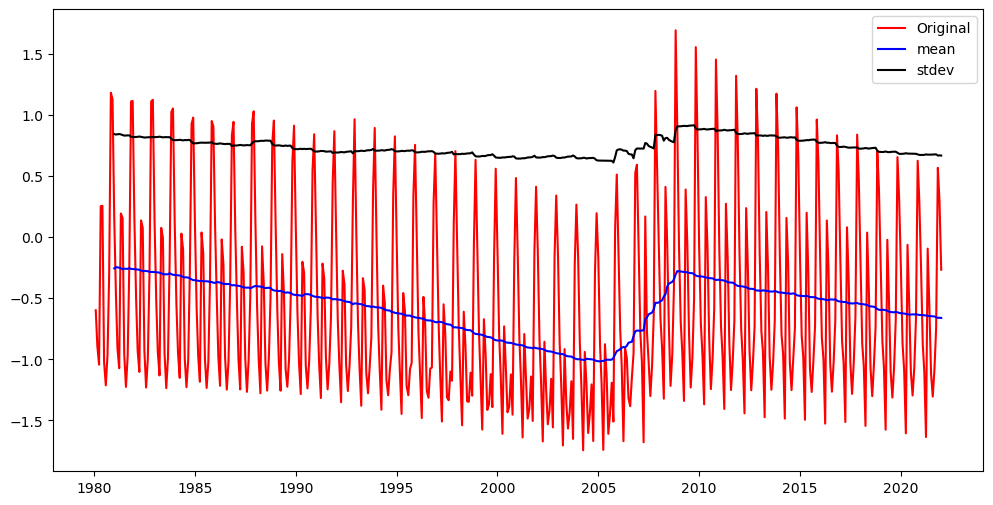

In [38]:
roll_mean = data2.rolling(12).mean()
roll_std = data2.rolling(12).std()

plt.figure(figsize=(12,6))
fig = plt.figure(1)

orig = plt.plot(data2, color='red', label = 'Original')
mean = plt.plot(roll_mean, color='blue', label = 'mean')
std = plt.plot(roll_std, color='black', label = 'stdev')

plt.legend(loc='best')
plt.show()

# HYBRID

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [3]:
print(sm.datasets.sunspots.NOTE)
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



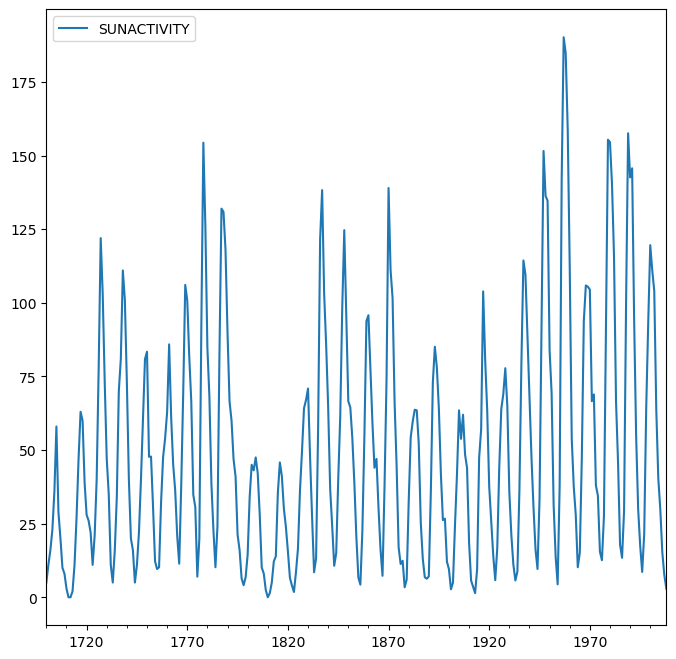

In [8]:
dta.plot(figsize=(8,8))
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
#split into test and train
percentage = 0.6
series = dta['SUNACTIVITY'].tolist()
size = int(len(series) * 0.66)
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train , order = (9,0,0))
model_fit = model.fit()

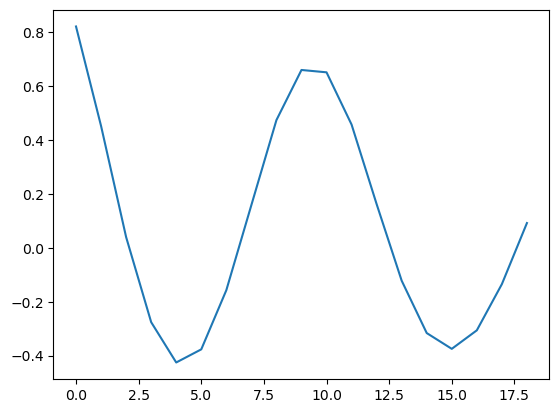

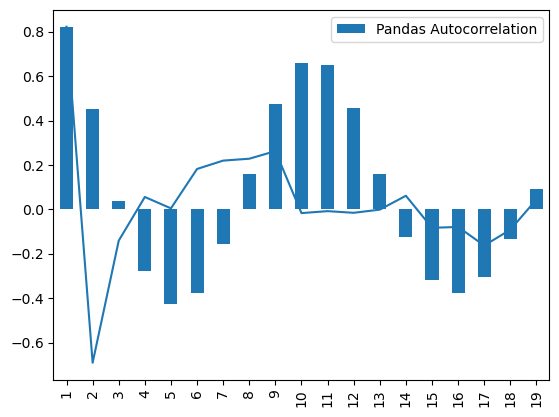

<Axes: >

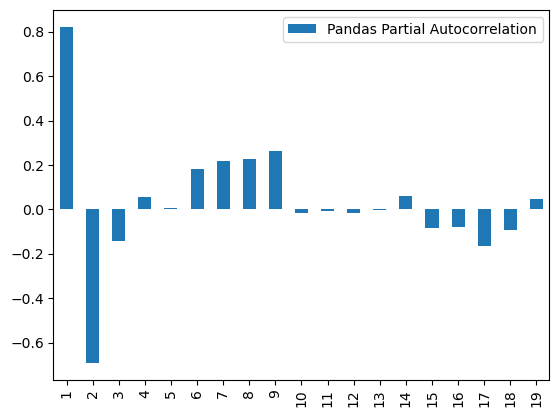

In [10]:
from statsmodels.tsa.stattools import acf, pacf
acf_1 = acf(series)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 = pacf(series)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
#from the figures we conclude that it is an AR process with a lag of 8-9

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [16]:
"""
Arima Rolling Forecast
"""
predicted1, resid_test = [], []
history = train
for t in range(len(test)):
    model = ARIMA(history, order=(9,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    resid_test.append(test[t] - output[0])
    predicted1.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=30.859034, expected=24.400000
predicted=53.777125, expected=42.000000
predicted=66.936736, expected=63.500000
predicted=72.648238, expected=53.800000
predicted=47.807027, expected=62.000000
predicted=56.256119, expected=48.500000
predicted=37.813219, expected=43.900000
predicted=32.268363, expected=18.600000
predicted=7.878094, expected=5.700000
predicted=4.979203, expected=3.600000
predicted=15.150979, expected=1.400000
predicted=18.216142, expected=9.600000
predicted=25.565121, expected=47.400000
predicted=70.191597, expected=57.100000
predicted=61.050341, expected=103.900000
predicted=106.154843, expected=80.600000
predicted=61.083645, expected=63.600000
predicted=34.672514, expected=37.600000
predicted=23.198590, expected=26.100000
predicted=14.488167, expected=14.200000
predicted=10.724416, expected=5.800000
predicted=14.473317, expected=16.700000
predicted=31.481563, expected=44.300000
predicted=71.529954, expected=63.900000
predicted=76.326556, expected=69.000000
predi

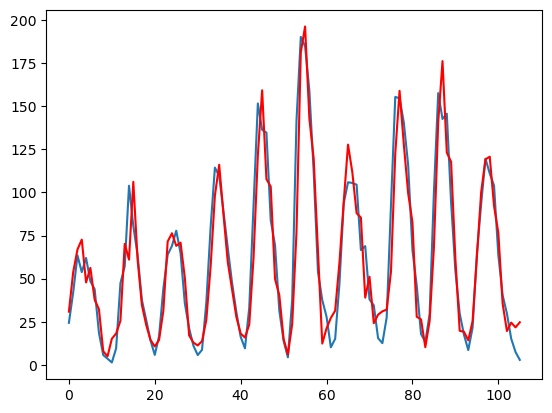

In [18]:
plt.plot(test)
plt.plot(predicted1, color='red')
plt.show()

In [19]:
test_resid = []
for i in resid_test:
    test_resid.append(i[0])
error = mean_squared_error(test, predicted1)
print('Test MSE: %.3f' % error)

IndexError: invalid index to scalar variable.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  203
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -823.876
Date:                Tue, 16 May 2023   AIC                           1669.751
Time:                        10:00:43   BIC                           1706.197
Sample:                             0   HQIC                          1684.496
                                - 203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.0435      7.122      5.903      0.000      28.085      56.003
ar.L1          1.2758      0.058     21.895      0.000       1.162       1.390
ar.L2         -0.5873      0.100     -5.857      0.0

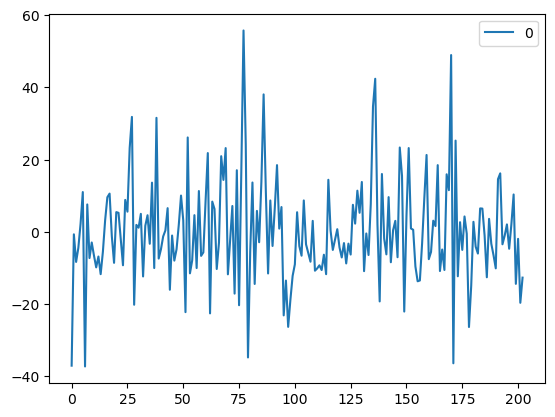

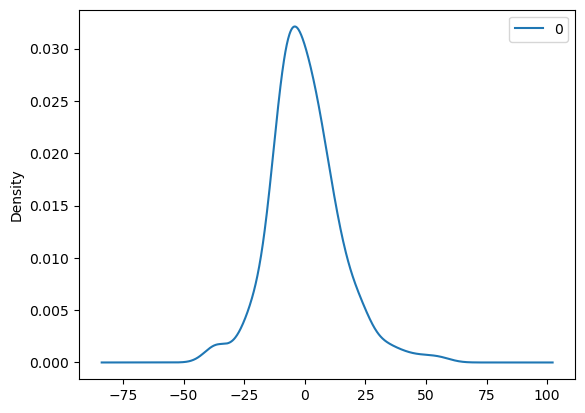

                0
count  203.000000
mean     0.083663
std     14.161015
min    -37.268507
25%     -8.376083
50%     -1.283609
75%      7.310458
max     55.722486


<Axes: >

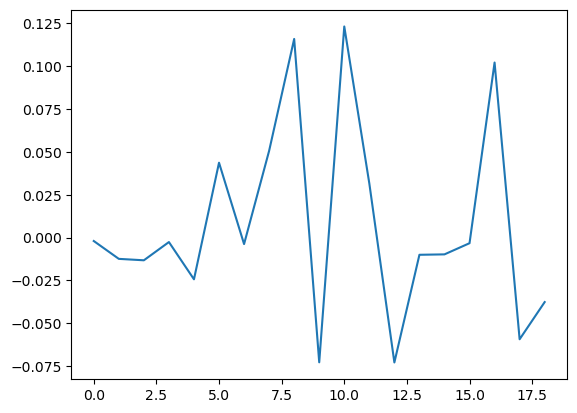

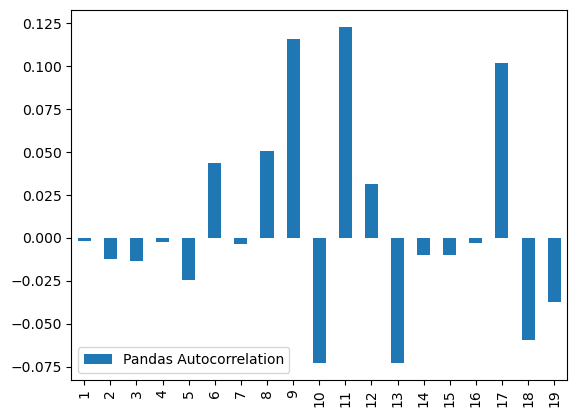

In [21]:
"""
Residual Diagnostics
"""
train, test = series[0:size], series[size:len(series)]
model = ARIMA(train, order=(9,0,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
#plot the acf for the residuals
acf_1 = acf(model_fit.resid)[1:20]
plt.plot(acf_1)
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ["Pandas Autocorrelation"]
test_df.index += 1
test_df.plot(kind='bar')
#from the acf obtained from the residuals we concule that 
#there is still a nonlinear relationship among the residuals

In [27]:
"""
Hybrid Model
"""
window_size = 50
def make_model(window_size):
    model = Sequential()
    model.add(Dense(50, input_dim=window_size, kernel_initializer="uniform", activation="tanh"))
    model.add(Dense(25, kernel_initializer="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#def make_lstm_model():
#   model = Sequential()
#   model.add(LSTM(
#        input_dim=1,
#        output_dim=50,
#        return_sequences=True))
#   model.add(Dropout(0.2))
#   model.add(LSTM(
#        100,
#        return_sequences=False))
#   model.add(Dropout(0.2))

#   model.add(Dense(
#        output_dim=1))
#   model.add(Activation("linear"))
#   model.compile(loss="mse", optimizer="rmsprop")
#   return model

model = make_model(50)
#lstm_model = make_lstm_model()
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)
test_data = []
test_data = np.array(test_data).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(test_data) ############

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
#new_train_X = np.reshape(new_train_X, (new_train_X.shape[0], new_train_X.shape[1], 1))
model.fit(new_train_X,new_train_Y, nb_epoch=500, batch_size=512, validation_split = .05)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [24]:
test_extended = train.tolist()[-1*window_size:] + test_resid
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_train_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(new_train_Y)
pred = pd.DataFrame(predictions)
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_resid,predictions_rescaled)
print('Test MSE: %.3f' % error)

NameError: name 'new_test_X' is not defined